<a href="https://colab.research.google.com/github/manishwargupta/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

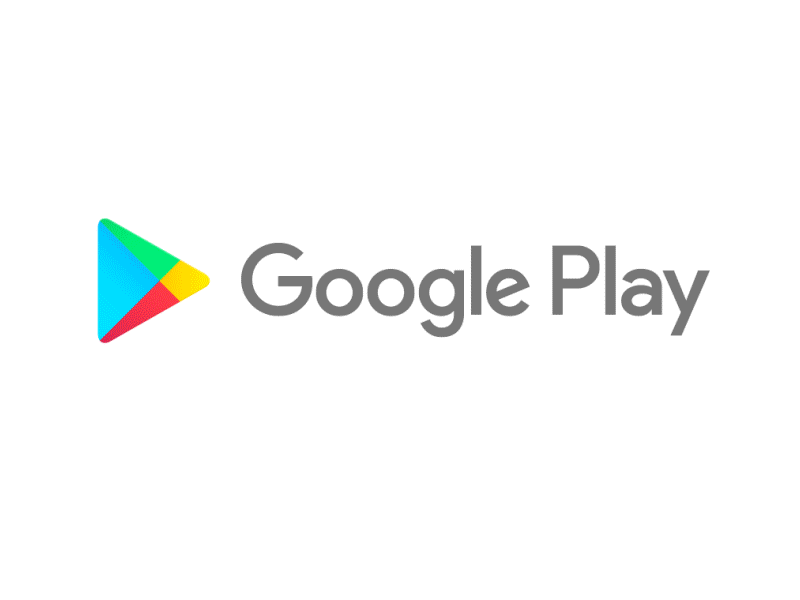

# **HELLO EVERYONE !**
In this notebook, I am going to analyze Google Play Store datas.Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

 Let's take a look at the data, which consists of two files:

 playstore data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

 user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity

# **PROBLEM STATEMENTS**

1). Which apps are the highest earners?

2). Top categories on Google Playstore?

3). Ratio between paid and free apps

4) Distribution of apps based on its size

5) Apps with the highest number of positive reviews

6) Apps with the highest number of negative reviews.

7) Is sentiment_subjectivity proportional to sentiment_polarity?

8) Does Last Update date has an effects on rating?

#**WHAT IS EXPLORATORY DATA ANALYSIS?**
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

The following are the various steps involved in the EDA process:


1.   **Problem Statement -** We shall brainstorm and understand the given data set. We shall study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.

2.   **Hypothesis -** Upon studying the attributes present in the data base, we shall develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.

3.   **Univariate Analysis -** It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.

4.   **Bivariate Analysis -** This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.
5.   **Multivariate Analysis -** This is done when more than two variables have to be analyzed simultaneously.
6.   **Data Cleaning -** We shall clean the dataset and handle the missing data, outliers and categorical variables. 
7.   **Testing Hypothesis -** We shall check if our data meets the assumptions required by most of the multivariate techniques.






#  **IMPORTING PACKAGES**  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# **MOUNTING DATASETS**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **READING DATASETS**

In [3]:
play_store = '/content/drive/MyDrive/Play Store Data/Play Store Data.csv'
df1 = pd.read_csv(play_store)
user_reviews = '/content/drive/MyDrive/Play Store Data/User Reviews.csv'
df2 = pd.read_csv(user_reviews)


In [4]:
df1.shape

(10841, 13)

In [5]:
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df1.size

140933

In [8]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:
1.   **App -** It tells us about the name of the application with a short description (optional).
2.   **Category -** It gives the category to the app.
3.   **Rating -** It contains the average rating the respective app received from its users.
4.   **Reviews -** It tells us about the total number of users who have given a review for the application.
5.   **Size -** It tells us about the size being occupied the application on the mobile phone.
6.   **Installs -** It tells us about the total number of installs/downloads for an application.
7.   **Type -** IIt states whether an app is free to use or paid.
8.   **Price -** It gives the price payable to install the app. For free type apps, the price is zero.
9.   **Content Rating -** It states whether or not an app is suitable for all age groups or not.
10.  **Genres -** It tells us about the various other categories to which an application can belong.
11.  **Last Updated -** It tells us about the when the application was updated.
12.  **Current Ver -** It tells us about the current version of the application.
13. **Android Ver -** It tells us about the android version which can support the application on its platform.



#**CLEANING OF THE DATA**
The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

Removing the Nan value and Duplicate present in the data set

#**HANDLING THE NAN VALUES IN THE PLAYSTORE**

In [9]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
def infodata():
  a = pd.DataFrame(index = df1.columns)
  a['data_type'] = df1.dtypes
  a['null_count'] = df1.isnull().sum()
  a['unique_count'] = df1.nunique()
  return a
  

In [11]:
infodata()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


#**TYPE**

In [12]:
df1[df1.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [13]:
df1['Type'].fillna("Free", inplace =True)

# **CONTENT RATING**

In [14]:
df1[df1['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
df1.loc[10470:10472, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df1.dropna(subset = ['Content Rating'], inplace = True)


# **RATING**

In [17]:
modeValueRating = df1['Rating'].mode()

In [18]:
df1['Rating'].fillna(value=modeValueRating[0], inplace = True)

#**HANDLING DUPLICATES VALUES AND MANIPULATING:**
#**1).Handling the duplicates in theApp column**

In [19]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df1['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [21]:
df1[df1['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [22]:
df1[df1.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [23]:
# dropping duplicates from the 'App' column.
df1.drop_duplicates(subset = 'App', inplace = True)
df1.shape
df1[df1['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


# **CHANGING THE DATATYPE**

In [24]:
df1['Reviews'] = df1.Reviews.astype(int)

In [25]:
df1['Size'] = df1['Size'].astype(str).str.replace('\D+', '')
df1['Size'] = df1.Size.apply(lambda x: x.replace(',', ''))
df1['Size'] = df1.Size.apply(lambda x: x.replace('M', 'e+6'))
df1['Size'] = df1.Size.apply(lambda x: x.replace('k', 'e+3'))
df1['Size'] = df1.Size.replace('Varies with device', np.NaN)
df1['Size'] = pd.to_numeric(df1['Size']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [26]:
df1.dropna(subset = ['Size'], inplace=True)

In [27]:
df1['Installs'] = df1.Installs.apply(lambda x: x.strip('+'))
df1['Installs'] = df1.Installs.apply(lambda x: x.replace(',', ''))
df1['Installs'] = pd.to_numeric(df1['Installs'])

In [28]:
df1['Price'] = df1.Price.apply(lambda x: x.strip('$'))
df1['Price'] = pd.to_numeric(df1['Price'])

#**EXPLORING USER REVIEW DATAFRAME**

In [29]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
print(df2.columns)
rows=df2.shape[0]
columns=df2.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

**Let us first define what information the columns contain based on our inspection.**

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

1.  **App:** Contains the name of the app with a short description (optional).
Translated_Review: It contains the English translation of the review dropped by the user of the app. 
2.   **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
3.   **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
4.   **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.








In [31]:
def infouserdata():
  temp1=pd.DataFrame(index=df2.columns)
  temp1["datatype"]=df2.dtypes
  temp1["not null values"]=df2.count()
  temp1["null value"]=df2.isnull().sum()
  temp1["% of the null value"]=df2.isnull().mean().round(4)*100
  temp1["unique count"]=df2.nunique()
  return temp1
infouserdata()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


#**HANDLING THE ERROR AND NAN VALUES IN THE USER REVIEWS**

In [32]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [33]:
df2[df2['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [34]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
df2[df2['Translated_Review'].isnull() & df2['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [35]:
df2 = df2.dropna()

In [36]:
df2.shape

(37427, 5)

In [37]:
df2.shape

(37427, 5)

# **DATA VISUALIZATION ON PLAY STORE DATA**

# 1. RATING GIVEN BY DIFFERENT OF AGE OF PEOPLE

In [ ]:
#Ratings given by different age of people
CR_df = df1['Content Rating'].value_counts()
CR_df

Everyone           7416
Teen                987
Mature 17+          406
Everyone 10+        332
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

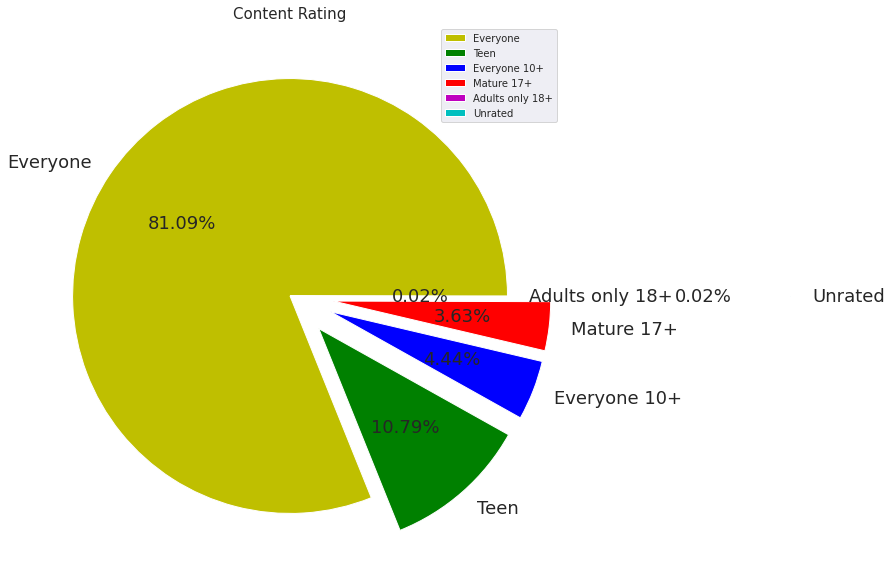

In [ ]:
CR_df = df1['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.2,0.2,0.2,0.0,1.3)
colors = ['y', 'g', 'b', 'r', 'm', 'c']
#colors=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2']
plt.pie(CR_df, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 18})
plt.title('Content Rating',size=15,loc='center')
plt.legend()

# 2. TOP CATEGORIES IN PLAYSTORE

In [ ]:
df1.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: App, dtype: int64

In [ ]:
x = df1['Category'].value_counts()
y = df1['Category'].value_counts().index
list_of_x = []
list_of_y = []
for i in range(len(x)):
    list_of_x.append(x[i])
    list_of_y.append(y[i])

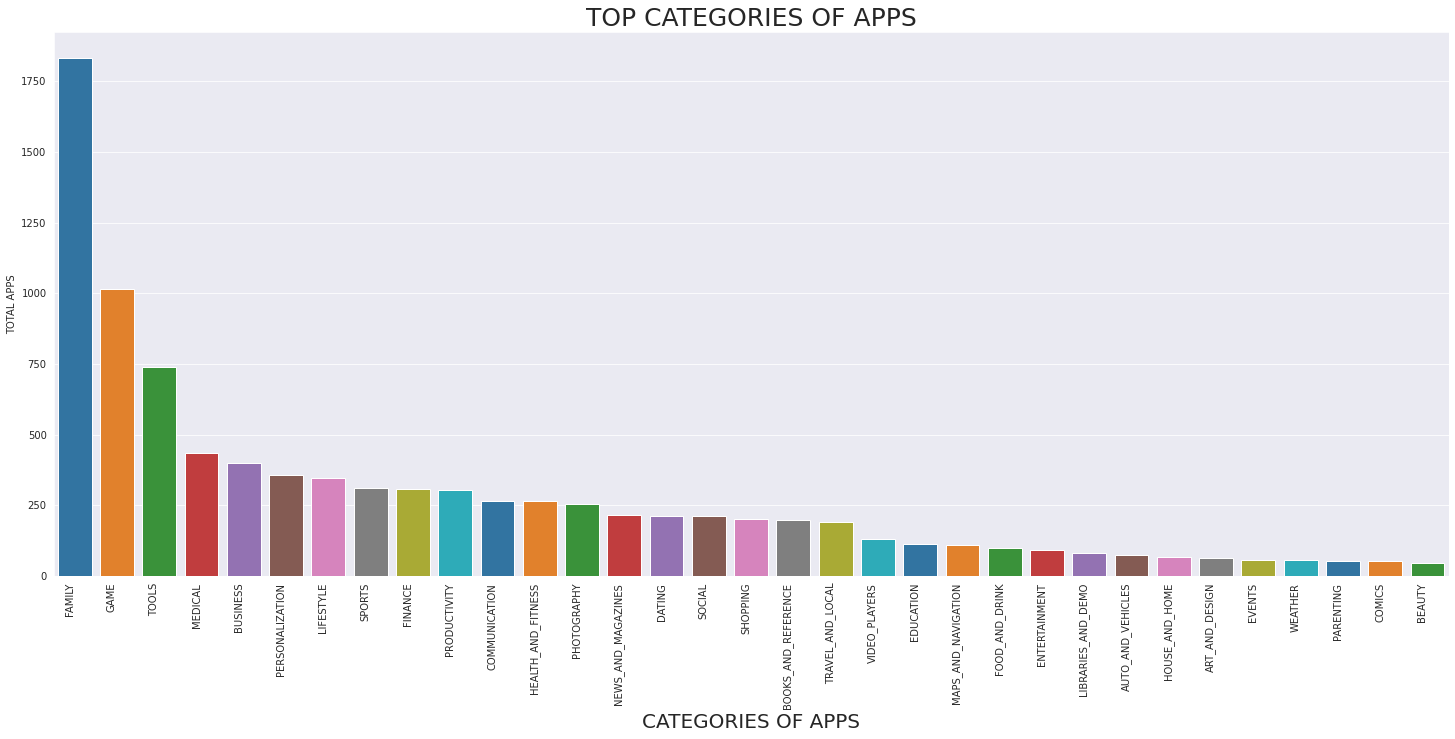

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(25,10))
plt.xlabel('CATEGORIES OF APPS', size=20)
plt.ylabel('TOTAL APPS', size=10)
graph = sns.barplot(y = list_of_x, x = list_of_y, palette= "tab10")
graph.set_title("TOP CATEGORIES OF APPS", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right',);

# 3.Which are the apps that have made the highest-earning?

*  ***For this we are going to do some operations to get the desired results. We are going to create a separate data frame in which we are simply doing the multiplication of |Price| and |Installs| columns to get the earnings of a particular app. Let's start ***

In [ ]:
paid_apps = df1[df1['Type'] == 'Paid']

***Now separating the column from above data frame***

In [ ]:
earning = paid_apps[['App', 'Installs', 'Price']]

***Now we are doing multiplication of |Installs| and |Price| to add a separate column for earning***

In [ ]:
earning['Earnings'] = earning['Installs'] * earning['Price'];

***Now sorting the above data by |Earnings| and |Price|***

In [ ]:
earning_sorted_by_Earnings = earning.sort_values(by='Earnings', ascending=False).head(20)

In [ ]:
earning_sorted_by_Price = earning_sorted_by_Earnings.sort_values(by='Price', ascending=False)

***Now its time to plot the graph and lets see which apps made the highest earning***

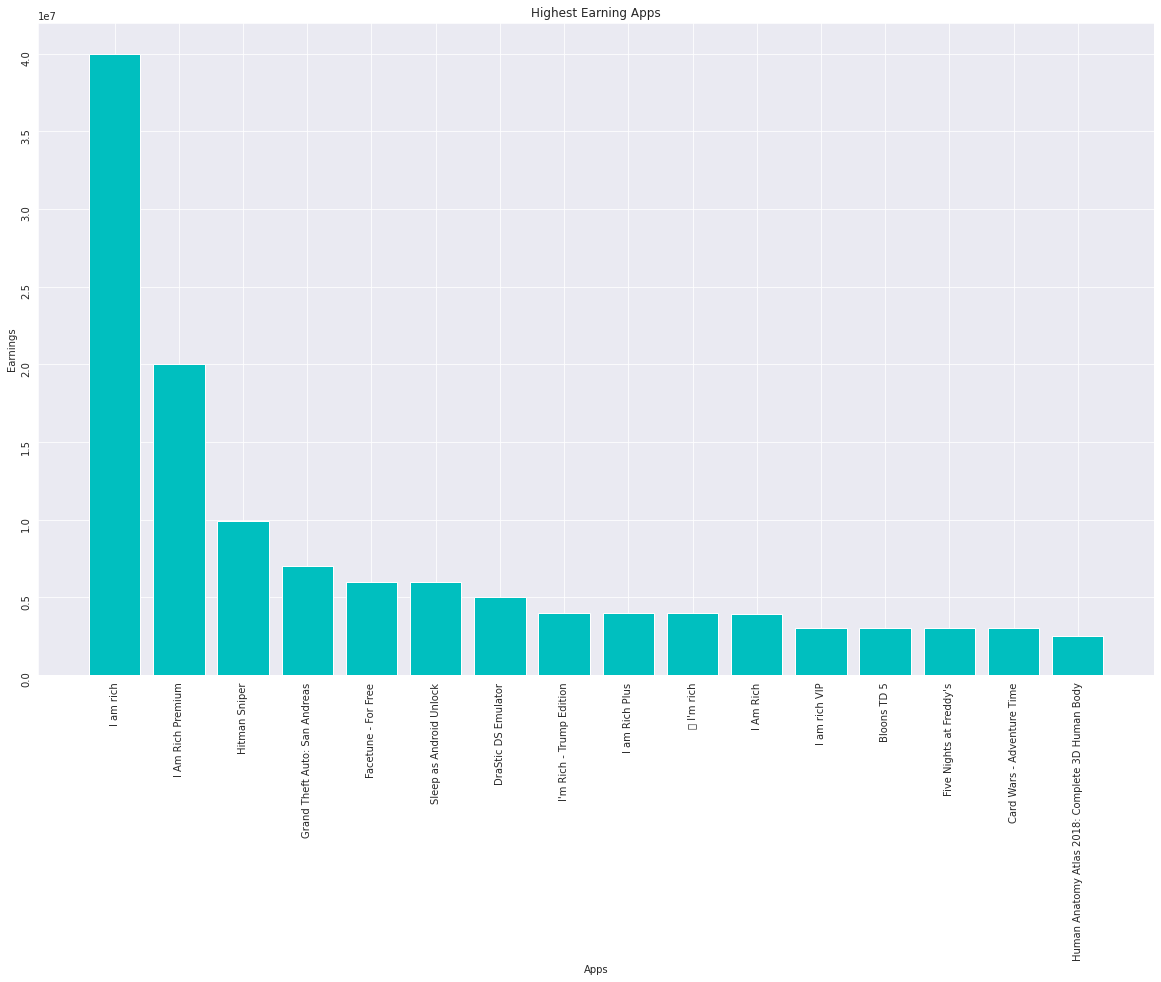

In [ ]:
#Here in a bar chart Y-Axis has earning and X-Axis has app names
plt.figure(figsize=(20,12))
plt.bar(earning_sorted_by_Earnings.App, earning_sorted_by_Earnings.Earnings, width=0.8, label=earning_sorted_by_Earnings.Earnings,color='c')
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Highest Earning Apps");

# 4.TOP GENRES IN PLAYSTORE

In [ ]:
genres_df1 = df1['Genres'].value_counts().head(20)

In [ ]:
x_Axis = []
y_Axis = []

for i in range(len(genres_df1)):
    x_Axis.append(genres_df1.index[i])
    y_Axis.append(genres_df1[i])

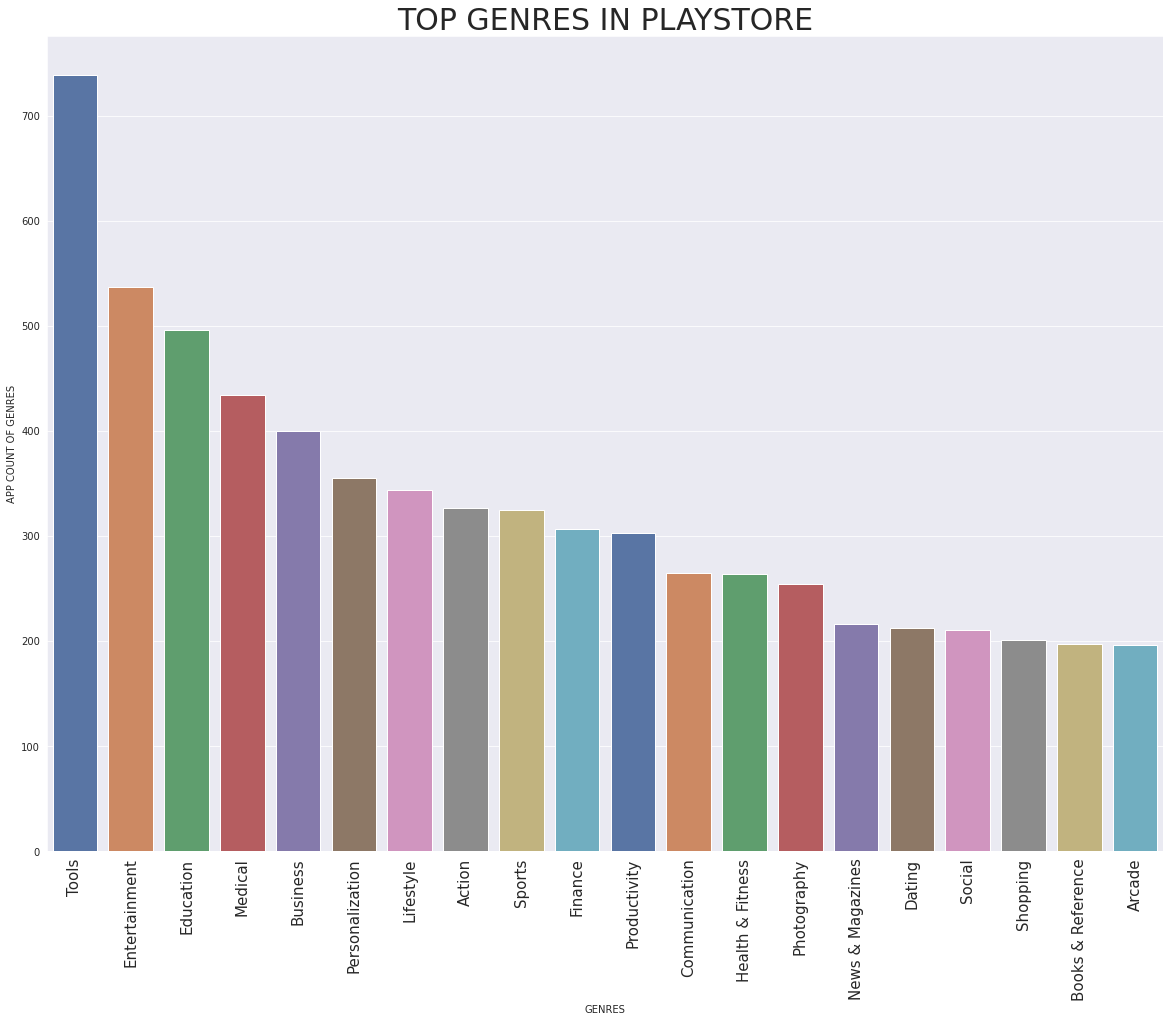

In [ ]:
plt.figure(figsize=(20,15))
plt.ylabel('APP COUNT OF GENRES')
plt.xlabel('GENRES')
graph = sns.barplot(x= x_Axis,y= y_Axis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=15)
graph.set_title("TOP GENRES IN PLAYSTORE", fontsize = 30);

# **DATA VISUALIZATIN IN USER REVIEW DATA**

# Is sentiment_subjectivity proportional to sentiment_polarity?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


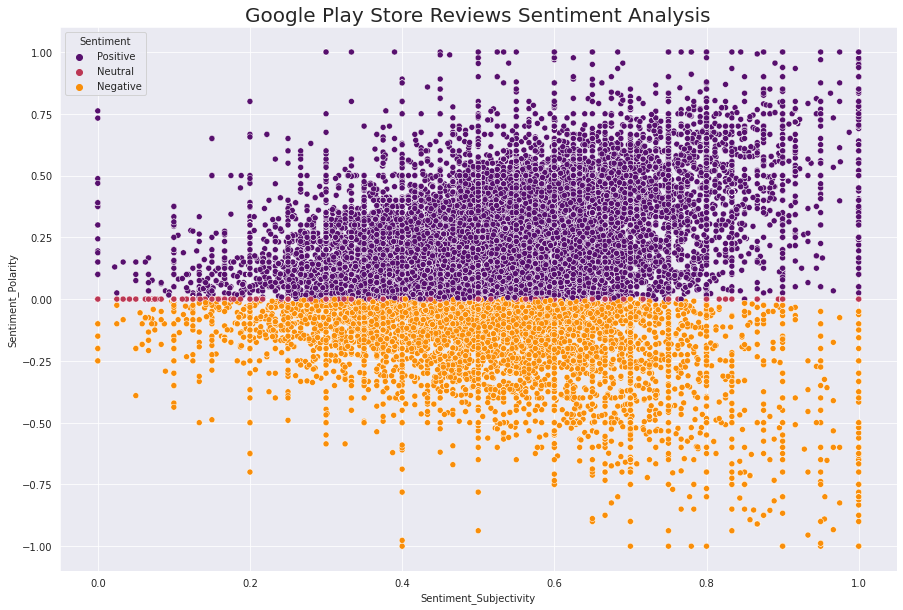

In [38]:
plt.figure(figsize=(15, 10))
sns.scatterplot(df2['Sentiment_Subjectivity'], df2['Sentiment_Polarity'],
                hue = df2['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

#**ANALYSIS SUMMARY** 

In this project of analyzing play store applications, we have worked on several parameters which would help AlmaBetter to do well in launching their apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.


*   Developing apps related to the least categories as they are not explored much. Like events and beauty.
*   Most of the apps are Free, so focusing on free app is more important.
Focusing more on content available for Everyone will increase the chances of getting the highest installs.
*   They need to focus on updating their apps regularly, so that it will attract more users.
*   They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.






